In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# print the data w/o omitting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Concrete-Frame Only

### Emission Data

In [3]:
# Import Emission Data
RC_Only_Emission_data = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Emission/RC_Only_Emission_annual.csv')
RC_Only_Emission_data = RC_Only_Emission_data.set_index(RC_Only_Emission_data.columns[0])

column = {'BAU2040': [], 'Mass-Timber (Low-end)': [], 'Mass-Timber (High-end)': [], 'Alternative Cement (Low-end)': [], 'Alternative Cement (High-end)': []}
index = ['Annual Net Emission', 'Percentage Change from BAU (Emission)', 'Annual Cost', 'Percentage Change from BAU (Cost)']

RC_Only_Emission_Cost = pd.DataFrame(index=index, columns=column.keys())
RC_Only_Emission_Cost = RC_Only_Emission_Cost.fillna(0)

# Emission
RC_Only_Emission_Cost.loc['Annual Net Emission', 'BAU2040'] = RC_Only_Emission_data.loc['Total Emission with RC', 'BAU2040_NetEmission']
RC_Only_Emission_Cost.loc['Annual Net Emission', 'Mass-Timber (Low-end)'] = RC_Only_Emission_data.loc['Total Emission with MT', 'Mass_Timber_NetEmission']
RC_Only_Emission_Cost.loc['Annual Net Emission', 'Mass-Timber (High-end)'] = RC_Only_Emission_data.loc['Total Emission with MT', 'Mass_Timber_NetEmission']
RC_Only_Emission_Cost.loc['Annual Net Emission', 'Alternative Cement (Low-end)'] = RC_Only_Emission_data.loc['Total Emission with CSA (Low-end)', "Alternative_Cement_NetEmission"]
RC_Only_Emission_Cost.loc['Annual Net Emission', 'Alternative Cement (High-end)'] = RC_Only_Emission_data.loc['Total Emission with AAC (High-end)', "Alternative_Cement_NetEmission"]

RC_Only_Emission_Cost


,BAU2040,Mass-Timber (Low-end),Mass-Timber (High-end),Alternative Cement (Low-end),Alternative Cement (High-end)
Annual Net Emission,4964.858686,-2469.231906,-2469.231906,-1622.885319,-3003.548949
Percentage Change from BAU (Emission),0.000000,0.000000,0.000000,0.000000,0.000000
Annual Cost,0.000000,0.000000,0.000000,0.000000,0.000000
Percentage Change from BAU (Cost),0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
# Calculate percentage change for emission
list1 = RC_Only_Emission_Cost.columns[1:].tolist()

for i in list1:
    RC_Only_Emission_Cost.loc['Percentage Change from BAU (Emission)', i] = ((RC_Only_Emission_Cost.loc['Annual Net Emission', i] - RC_Only_Emission_Cost.loc['Annual Net Emission', 'BAU2040']) / abs(RC_Only_Emission_Cost.loc['Annual Net Emission', 'BAU2040'])) * 100

RC_Only_Emission_Cost

,BAU2040,Mass-Timber (Low-end),Mass-Timber (High-end),Alternative Cement (Low-end),Alternative Cement (High-end)
Annual Net Emission,4964.858686,-2469.231906,-2469.231906,-1622.885319,-3003.548949
Percentage Change from BAU (Emission),0.000000,-149.734183,-149.734183,-132.687442,-160.496162
Annual Cost,0.000000,0.000000,0.000000,0.000000,0.000000
Percentage Change from BAU (Cost),0.000000,0.000000,0.000000,0.000000,0.000000


### Cost

In [5]:
# Import Cost Data
RC_Only_Cost_data = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Cost/RC_Only_Cost_annual.csv')
RC_Only_Cost_data = RC_Only_Cost_data.set_index(RC_Only_Cost_data.columns[0])

# Cost
RC_Only_Emission_Cost.loc['Annual Cost', 'BAU2040'] = RC_Only_Cost_data.loc['Total Cost of RC', 'BAU 2040']
RC_Only_Emission_Cost.loc['Annual Cost', 'Mass-Timber (Low-end)'] = RC_Only_Cost_data.loc['Total Cost of MT (Low-end)', 'Mass-Timber']
RC_Only_Emission_Cost.loc['Annual Cost', 'Mass-Timber (High-end)'] = RC_Only_Cost_data.loc['Total Cost of MT (High-end)', 'Mass-Timber']
RC_Only_Emission_Cost.loc['Annual Cost', 'Alternative Cement (Low-end)'] = RC_Only_Cost_data.loc['Total Cost of CSA (Low-end)', "Alternative Cement"]
RC_Only_Emission_Cost.loc['Annual Cost', 'Alternative Cement (High-end)'] = RC_Only_Cost_data.loc['Total Cost of AAC (High-end)', "Alternative Cement"]

In [6]:
# Calculate percentage change for cost
list1 = RC_Only_Emission_Cost.columns[1:].tolist()

for i in list1:
    RC_Only_Emission_Cost.loc['Percentage Change from BAU (Cost)', i] = ((RC_Only_Emission_Cost.loc['Annual Cost', i] - RC_Only_Emission_Cost.loc['Annual Cost', 'BAU2040']) / abs(RC_Only_Emission_Cost.loc['Annual Cost', 'BAU2040'])) * 100

RC_Only_Emission_Cost

,BAU2040,Mass-Timber (Low-end),Mass-Timber (High-end),Alternative Cement (Low-end),Alternative Cement (High-end)
Annual Net Emission,4.964859e+03,-2.469232e+03,-2.469232e+03,-1.622885e+03,-3.003549e+03
Percentage Change from BAU (Emission),0.000000e+00,-1.497342e+02,-1.497342e+02,-1.326874e+02,-1.604962e+02
Annual Cost,8.787803e+07,8.567381e+07,9.911712e+07,9.170376e+07,9.434946e+07
Percentage Change from BAU (Cost),0.000000e+00,-2.508269e+00,1.278942e+01,4.353451e+00,7.364105e+00


## City-Wide

### Emission

In [7]:
# Import Emission Data
City_Wide_Emission_data = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Emission/City_Wide_Emission_annual.csv')
City_Wide_Emission_data = City_Wide_Emission_data.set_index(City_Wide_Emission_data.columns[0])

# Create Data Frame
column = {'BAU2040': [], 'Mass-Timber (Low-end)': [], 'Mass-Timber (High-end)': [], 'Alternative Cement (Low-end)': [], 'Alternative Cement (High-end)': []}
index = ['Annual Net Emission', 'Percentage Change from BAU (Emission)', 'Annual Cost', 'Percentage Change from BAU (Cost)']

City_Wide_Emission_Cost = pd.DataFrame(index=index, columns=column.keys())
City_Wide_Emission_Cost = City_Wide_Emission_Cost.fillna(0)


# Emission
City_Wide_Emission_Cost.loc['Annual Net Emission', 'BAU2040'] = City_Wide_Emission_data.loc['Total Emission with LF&RC&MT', 'BAU2040_NetEmission']
City_Wide_Emission_Cost.loc['Annual Net Emission', 'Mass-Timber (Low-end)'] = City_Wide_Emission_data.loc['Total Emission with LF&RC&MT', 'Mass_Timber_NetEmission']
City_Wide_Emission_Cost.loc['Annual Net Emission', 'Mass-Timber (High-end)'] = City_Wide_Emission_data.loc['Total Emission with LF&RC&MT', 'Mass_Timber_NetEmission']
City_Wide_Emission_Cost.loc['Annual Net Emission', 'Alternative Cement (Low-end)'] = City_Wide_Emission_data.loc['Total Emission with CSA (Low-end)', "Alternative_Cement_NetEmission"]
City_Wide_Emission_Cost.loc['Annual Net Emission', 'Alternative Cement (High-end)'] = City_Wide_Emission_data.loc['Total Emission with AAC (High-end)', "Alternative_Cement_NetEmission"]

# City_Wide_Emission_Cost

In [8]:
# Calculate percentage change for emission
list1 = City_Wide_Emission_Cost.columns[1:].tolist()

for i in list1:
    City_Wide_Emission_Cost.loc['Percentage Change from BAU (Emission)', i] = ((City_Wide_Emission_Cost.loc['Annual Net Emission', i] - City_Wide_Emission_Cost.loc['Annual Net Emission', 'BAU2040']) / abs(City_Wide_Emission_Cost.loc['Annual Net Emission', 'BAU2040'])) * 100

# City_Wide_Emission_Cost

### Cost

In [9]:
# Import Cost Data
City_Wide_Cost_data = pd.read_csv('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Cost/City_Wide_Cost_annual.csv')
City_Wide_Cost_data = City_Wide_Cost_data.set_index(City_Wide_Cost_data.columns[0])


# Cost
City_Wide_Emission_Cost.loc['Annual Cost', 'BAU2040'] = City_Wide_Cost_data.loc['Total Cost of LF & RC (BAU)', 'BAU 2040']
City_Wide_Emission_Cost.loc['Annual Cost', 'Mass-Timber (Low-end)'] = City_Wide_Cost_data.loc['Total Cost of MT (Low-end)', 'Mass-Timber']
City_Wide_Emission_Cost.loc['Annual Cost', 'Mass-Timber (High-end)'] = City_Wide_Cost_data.loc['Total Cost of MT (High-end)', 'Mass-Timber']
City_Wide_Emission_Cost.loc['Annual Cost', 'Alternative Cement (Low-end)'] = City_Wide_Cost_data.loc['Total Cost of CSA (Low-end)', "Alternative Cement"]
City_Wide_Emission_Cost.loc['Annual Cost', 'Alternative Cement (High-end)'] = City_Wide_Cost_data.loc['Total Cost of AAC (High-end)', "Alternative Cement"]

City_Wide_Emission_Cost

,BAU2040,Mass-Timber (Low-end),Mass-Timber (High-end),Alternative Cement (Low-end),Alternative Cement (High-end)
Annual Net Emission,9.917571e+03,2.483480e+03,2.483480e+03,3.329827e+03,1.949163e+03
Percentage Change from BAU (Emission),0.000000e+00,-7.495878e+01,-7.495878e+01,-6.642497e+01,-8.034636e+01
Annual Cost,2.548615e+08,2.526573e+08,2.661006e+08,2.586872e+08,2.613329e+08
Percentage Change from BAU (Cost),0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [10]:
# Calculate percentage change for cost
list1 = City_Wide_Emission_Cost.columns[1:].tolist()

for i in list1:
    City_Wide_Emission_Cost.loc['Percentage Change from BAU (Cost)', i] = ((City_Wide_Emission_Cost.loc['Annual Cost', i] - City_Wide_Emission_Cost.loc['Annual Cost', 'BAU2040']) / abs(City_Wide_Emission_Cost.loc['Annual Cost', 'BAU2040'])) * 100

City_Wide_Emission_Cost

,BAU2040,Mass-Timber (Low-end),Mass-Timber (High-end),Alternative Cement (Low-end),Alternative Cement (High-end)
Annual Net Emission,9.917571e+03,2.483480e+03,2.483480e+03,3.329827e+03,1.949163e+03
Percentage Change from BAU (Emission),0.000000e+00,-7.495878e+01,-7.495878e+01,-6.642497e+01,-8.034636e+01
Annual Cost,2.548615e+08,2.526573e+08,2.661006e+08,2.586872e+08,2.613329e+08
Percentage Change from BAU (Cost),0.000000e+00,-8.648687e-01,4.409880e+00,1.501100e+00,2.539195e+00


## Make Figure for cost vs emission

### Concrete-frame Only

In [11]:
# Change the unit of data
RC_Only_Emission_Cost.loc['Annual Net Emission'] = RC_Only_Emission_Cost.loc['Annual Net Emission'] / 1000
RC_Only_Emission_Cost.loc['Annual Cost'] = RC_Only_Emission_Cost.loc['Annual Cost'] / 1e6

RC_Only_Emission_Cost_updated = RC_Only_Emission_Cost.copy()
RC_Only_Emission_Cost_updated

,BAU2040,Mass-Timber (Low-end),Mass-Timber (High-end),Alternative Cement (Low-end),Alternative Cement (High-end)
Annual Net Emission,4.964859,-2.469232,-2.469232,-1.622885,-3.003549
Percentage Change from BAU (Emission),0.000000,-149.734183,-149.734183,-132.687442,-160.496162
Annual Cost,87.878029,85.673812,99.117115,91.703756,94.349459
Percentage Change from BAU (Cost),0.000000,-2.508269,12.789416,4.353451,7.364105


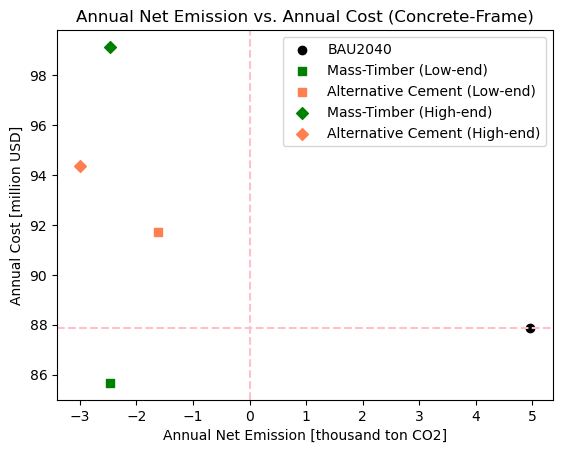

In [12]:
x_data_RC_Only = RC_Only_Emission_Cost_updated.loc['Annual Net Emission']
y_data_RC_Only = RC_Only_Emission_Cost_updated.loc['Annual Cost']

# Creating the scatter plot with different colors and marker styles for each scenario
plt.scatter(x_data_RC_Only['BAU2040'], y_data_RC_Only['BAU2040'], color='black', label='BAU2040')

# Mass-Timber (Low-end) and Alternative Cement (Low-end) scenarios with square marker
plt.scatter(x_data_RC_Only['Mass-Timber (Low-end)'], y_data_RC_Only['Mass-Timber (Low-end)'], color='green', label='Mass-Timber (Low-end)', marker='s')
plt.scatter(x_data_RC_Only['Alternative Cement (Low-end)'], y_data_RC_Only['Alternative Cement (Low-end)'], color='coral', label='Alternative Cement (Low-end)', marker='s')

# Mass-Timber (High-end) and Alternative Cement (High-end) scenarios with diamond marker
plt.scatter(x_data_RC_Only['Mass-Timber (High-end)'], y_data_RC_Only['Mass-Timber (High-end)'], color='green', label='Mass-Timber (High-end)', marker='D')
plt.scatter(x_data_RC_Only['Alternative Cement (High-end)'], y_data_RC_Only['Alternative Cement (High-end)'], color='coral', label='Alternative Cement (High-end)', marker='D')


# Adding labels and title
plt.xlabel('Annual Net Emission [thousand ton CO2]')
plt.ylabel('Annual Cost [million USD]')
plt.title('Annual Net Emission vs. Annual Cost (Concrete-Frame)')

# Adding a legend
plt.legend()

# Drawing dashed vertical line at x=0
plt.axvline(x=0, color='pink', linestyle='--', label='x=0')
bau2040_y = y_data_RC_Only['BAU2040']
plt.axhline(y=bau2040_y, color='pink', linestyle='--', label='BAU2040')


plt.savefig('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Figure/Emission_Cost_RC.png')

### City-Wide Scale

In [13]:
# Change the unit of data
City_Wide_Emission_Cost.loc['Annual Net Emission'] = City_Wide_Emission_Cost.loc['Annual Net Emission'] / 1000
City_Wide_Emission_Cost.loc['Annual Cost'] = City_Wide_Emission_Cost.loc['Annual Cost'] / 1e6

City_Wide_Emission_Cost_updated = City_Wide_Emission_Cost.copy()
City_Wide_Emission_Cost_updated

,BAU2040,Mass-Timber (Low-end),Mass-Timber (High-end),Alternative Cement (Low-end),Alternative Cement (High-end)
Annual Net Emission,9.917571,2.483480,2.483480,3.329827,1.949163
Percentage Change from BAU (Emission),0.000000,-74.958783,-74.958783,-66.424974,-80.346363
Annual Cost,254.861517,252.657299,266.100603,258.687244,261.332947
Percentage Change from BAU (Cost),0.000000,-0.864869,4.409880,1.501100,2.539195


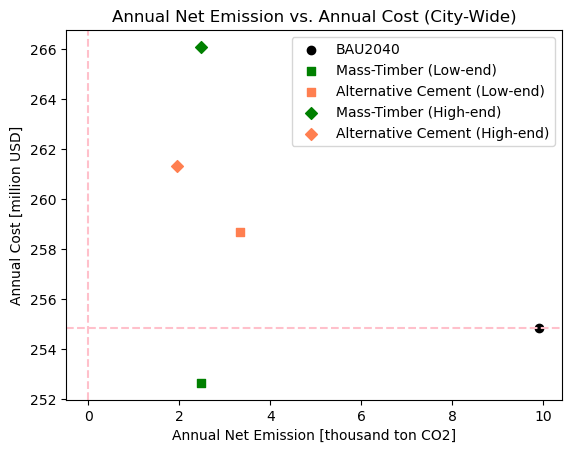

In [14]:
x_data_City_Wide = City_Wide_Emission_Cost_updated.loc['Annual Net Emission']
y_data_City_Wide = City_Wide_Emission_Cost_updated.loc['Annual Cost']

# Creating the scatter plot with different colors and marker styles for each scenario
plt.scatter(x_data_City_Wide['BAU2040'], y_data_City_Wide['BAU2040'], color='black', label='BAU2040')

# Mass-Timber (Low-end) and Alternative Cement (Low-end) scenarios with square marker
plt.scatter(x_data_City_Wide['Mass-Timber (Low-end)'], y_data_City_Wide['Mass-Timber (Low-end)'], color='green', label='Mass-Timber (Low-end)', marker='s')
plt.scatter(x_data_City_Wide['Alternative Cement (Low-end)'], y_data_City_Wide['Alternative Cement (Low-end)'], color='coral', label='Alternative Cement (Low-end)', marker='s')

# Mass-Timber (High-end) and Alternative Cement (High-end) scenarios with diamond marker
plt.scatter(x_data_City_Wide['Mass-Timber (High-end)'], y_data_City_Wide['Mass-Timber (High-end)'], color='green', label='Mass-Timber (High-end)', marker='D')
plt.scatter(x_data_City_Wide['Alternative Cement (High-end)'], y_data_City_Wide['Alternative Cement (High-end)'], color='coral', label='Alternative Cement (High-end)', marker='D')


# Adding labels and title
plt.xlabel('Annual Net Emission [thousand ton CO2]')
plt.ylabel('Annual Cost [million USD]')
plt.title('Annual Net Emission vs. Annual Cost (City-Wide)')

# Adding a legend
plt.legend()

# Drawing dashed vertical line at x=0
plt.axvline(x=0, color='pink', linestyle='--', label='x=0')
bau2040_y = y_data_City_Wide['BAU2040']
plt.axhline(y=bau2040_y, color='pink', linestyle='--', label='BAU2040')

plt.savefig('/Users/akihi/Library/CloudStorage/OneDrive-PrincetonUniversity/Projects/Building Material in Cities/1st Research/Code/Separated Code/Figure/Emission_Cost_City_Wide.png')